In [1]:
#!pip install pandas
#!pip install openpyxl
import pandas as pd
import matplotlib.pyplot as plt

# Specify the path to your Excel file
file_path = "data-sources/UT-State Tax monthly-sales-historical.xlsx"

# Read the Excel file
ut_state_tax_df = pd.read_excel(file_path, sheet_name="Table 6", skiprows=5)

# Display the first few rows of the DataFrame
ut_state_tax_df


,Month,County,Location Code,City,Economic Supersector,Taxable Sales,Unnamed: 6
0,1998-01-01 00:00:00,Beaver County,1002.0,Beaver City,Taxable Services,446755.63,NaN
1,1998-01-01 00:00:00,Beaver County,1002.0,Beaver City,Taxable Retail Trade,416092.61,NaN
2,1998-01-01 00:00:00,Beaver County,1002.0,Beaver City,Taxable Business Investment,145603.39,NaN
3,1998-01-01 00:00:00,Beaver County,1002.0,Beaver City,All Other Taxable Sales,70000.00,*
4,1998-01-01 00:00:00,Box Elder County,2017.0,Brigham,Taxable Services,2319265.04,NaN
...,...,...,...,...,...,...,...
80202,2024-06-01 00:00:00,Weber County,29040.0,South Ogden,Taxable Retail Trade,35181754.00,NaN
80203,2024-06-01 00:00:00,Weber County,29040.0,South Ogden,Taxable Business Investment,1265640.00,NaN
80204,2024-06-01 00:00:00,Weber County,29040.0,South Ogden,All Other Taxable Sales,1070505.00,NaN
80205,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Drop unnecessary rows
ut_state_tax_df = ut_state_tax_df.iloc[:-2]

In [3]:
# Reformat "Month" column into "Year" and "Month" for better readability
ut_state_tax_df['date'] = pd.to_datetime(ut_state_tax_df['Month'])

# Create new columns for year and month
ut_state_tax_df['year'] = ut_state_tax_df['date'].dt.year
ut_state_tax_df['month'] = ut_state_tax_df['date'].dt.month

# Drop unnecessary columns
ut_state_tax_df = ut_state_tax_df.drop(columns=['Month'])
ut_state_tax_df = ut_state_tax_df.drop(columns=['Unnamed: 6'])

# Lowercase columns for best practice
ut_state_tax_df.columns = ut_state_tax_df.columns.str.lower()

# Reorder dataframe
cols = ['year', 'month'] + [col for col in ut_state_tax_df.columns if col not in ['year', 'month']]
ut_state_tax_df = ut_state_tax_df[cols]
ut_state_tax_df

C:\Users\drpon\AppData\Local\Temp\ipykernel_3400\990299209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ut_state_tax_df['date'] = pd.to_datetime(ut_state_tax_df['Month'])
C:\Users\drpon\AppData\Local\Temp\ipykernel_3400\990299209.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ut_state_tax_df['year'] = ut_state_tax_df['date'].dt.year
C:\Users\drpon\AppData\Local\Temp\ipykernel_3400\990299209.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,year,month,county,location code,city,economic supersector,taxable sales,date
0,1998,1,Beaver County,1002.0,Beaver City,Taxable Services,446755.63,1998-01-01
1,1998,1,Beaver County,1002.0,Beaver City,Taxable Retail Trade,416092.61,1998-01-01
2,1998,1,Beaver County,1002.0,Beaver City,Taxable Business Investment,145603.39,1998-01-01
3,1998,1,Beaver County,1002.0,Beaver City,All Other Taxable Sales,70000.00,1998-01-01
4,1998,1,Box Elder County,2017.0,Brigham,Taxable Services,2319265.04,1998-01-01
...,...,...,...,...,...,...,...,...
80200,2024,6,Weber County,29037.0,Roy,All Other Taxable Sales,1972722.00,2024-06-01
80201,2024,6,Weber County,29040.0,South Ogden,Taxable Services,9344365.00,2024-06-01
80202,2024,6,Weber County,29040.0,South Ogden,Taxable Retail Trade,35181754.00,2024-06-01
80203,2024,6,Weber County,29040.0,South Ogden,Taxable Business Investment,1265640.00,2024-06-01


In [4]:
# Restrict dataframe to counties adjacent to Salt Lake City
adjacent_counties = ['Salt Lake County', 'Davis County', 'Tooele County', 'Utah County', 'Wasatch County', 'Morgan County', 'Summit County']
adjacent_counties_df = ut_state_tax_df.loc[ut_state_tax_df["county"].isin(adjacent_counties), :]
adjacent_counties_df

,year,month,county,location code,city,economic supersector,taxable sales,date
20,1998,1,Davis County,6004.0,Bountiful,Taxable Services,3834333.30,1998-01-01
21,1998,1,Davis County,6004.0,Bountiful,Taxable Retail Trade,14326492.29,1998-01-01
22,1998,1,Davis County,6004.0,Bountiful,Taxable Business Investment,967555.88,1998-01-01
23,1998,1,Davis County,6004.0,Bountiful,All Other Taxable Sales,638271.43,1998-01-01
24,1998,1,Davis County,6006.0,Centerville,Taxable Services,987737.80,1998-01-01
...,...,...,...,...,...,...,...,...
80168,2024,6,Utah County,25106.0,Springville,All Other Taxable Sales,4592268.00,2024-06-01
80169,2024,6,Wasatch County,26008.0,Heber,Taxable Services,14658156.00,2024-06-01
80170,2024,6,Wasatch County,26008.0,Heber,Taxable Retail Trade,46662474.00,2024-06-01
80171,2024,6,Wasatch County,26008.0,Heber,Taxable Business Investment,7079416.00,2024-06-01


In [5]:
# Prepare df to analyze change in sales over the years
yearly_county_df = adjacent_counties_df.groupby(['date', 'year', 'month', 'county']).sum().reset_index()
yearly_county_df = yearly_county_df.drop(columns=['city', 'economic supersector'])
yearly_county_df = yearly_county_df.rename(columns={'taxable sales': 'sales'})
yearly_county_df

,date,year,month,county,location code,sales
0,1998-01-01,1998,1,Davis County,241172.0,1.155135e+08
1,1998-01-01,1998,1,Morgan County,60028.0,1.110000e+06
2,1998-01-01,1998,1,Salt Lake County,869360.0,9.510885e+08
3,1998-01-01,1998,1,Summit County,88120.0,4.415349e+07
4,1998-01-01,1998,1,Tooele County,92192.0,1.083667e+07
...,...,...,...,...,...,...
2221,2024-06-01,2024,6,Salt Lake County,1305544.0,3.200921e+09
2222,2024-06-01,2024,6,Summit County,88120.0,9.018223e+07
2223,2024-06-01,2024,6,Tooele County,92192.0,7.188431e+07
2224,2024-06-01,2024,6,Utah County,1103284.0,1.338320e+09


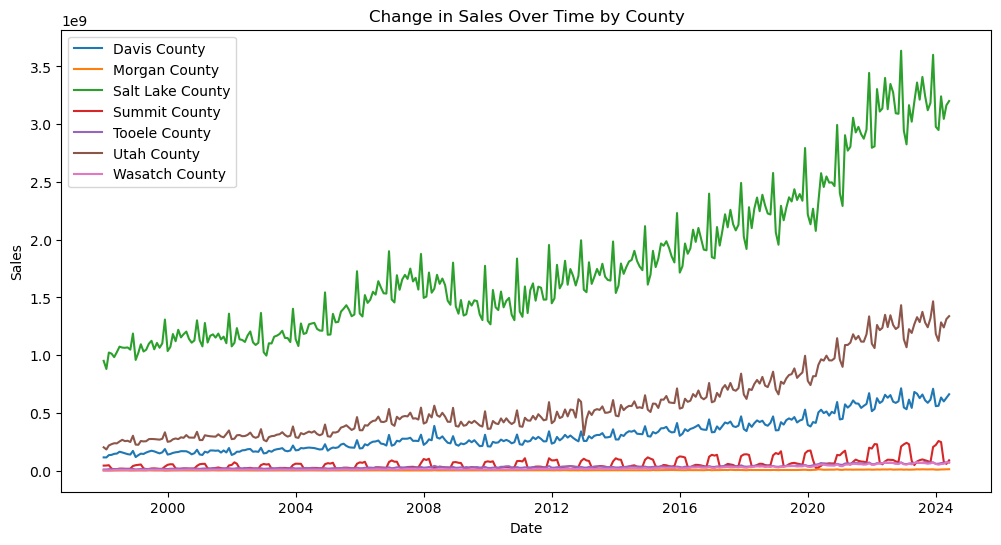

In [6]:
# Plot this change in sales over time
sales_by_county = adjacent_counties_df.groupby(['date', 'county'])['taxable sales'].sum().reset_index()
sales_by_county = sales_by_county.rename(columns={'taxable sales': 'sales'})
sales_by_county

country_sales_pivot = sales_by_county.pivot(index='date', columns='county', values='sales')

plt.figure(figsize=(12, 6))
for county in country_sales_pivot.columns:
    plt.plot(country_sales_pivot.index, country_sales_pivot[county], label=county)

plt.title('Change in Sales Over Time by County')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

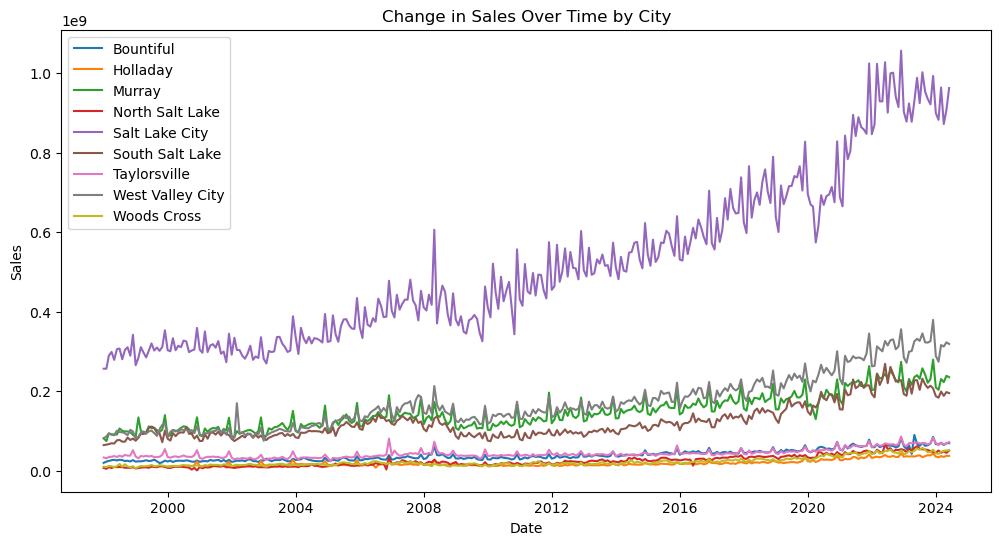

In [7]:
# Plot this change in sales over time
sales_by_city = adjacent_counties_df.groupby(['date', 'city'])['taxable sales'].sum().reset_index()
sales_by_city = sales_by_city.rename(columns={'taxable sales': 'sales'})

adjacent_cities = ['Salt Lake City', 'West Valley City', 'South Salt Lake', 'North Salt Lake', 'Woods Cross', 'Bountiful', 'Taylorsville', 'Murray', 'Holladay']
adjacent_cities_df = sales_by_city.loc[sales_by_city["city"].isin(adjacent_cities), :]

city_sales_pivot = adjacent_cities_df.pivot(index='date', columns='city', values='sales')

plt.figure(figsize=(12, 6))
for city in city_sales_pivot.columns:
    plt.plot(city_sales_pivot.index, city_sales_pivot[city], label=city)

plt.title('Change in Sales Over Time by City')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [8]:
# Read in information on Utah's economic sectors
# Read the Excel file
ut_econ_sectors_df = pd.read_excel(file_path, sheet_name="Table 2", skiprows=5)

# Drop unnecessary rows
ut_econ_sectors_df = ut_econ_sectors_df.iloc[:-2]

# Drop Unnecessary columns
ut_econ_sectors_df = ut_econ_sectors_df.drop(columns='Unnamed: 3')

# Display the first few rows of the DataFrame
ut_econ_sectors_df

,Month,Economic Sector (NAICS Code),Taxable Sales
0,1998-01-01 00:00:00,"AGRICULTURE, FORESTRY, FISHING & HUNTING (11)",3.500000e+05
1,1998-01-01 00:00:00,"MINING, QUARRYING, & OIL & GAS EXTRACTION (21)",1.425421e+07
2,1998-01-01 00:00:00,UTILITIES (22),1.266126e+08
3,1998-01-01 00:00:00,CONSTRUCTION (23),1.229662e+07
4,1998-01-01 00:00:00,MANUFACTURING (31-33),1.035424e+08
...,...,...,...
11758,2024-06-01 00:00:00,OTHER SERVICES-EXCEPT PUBLIC ADMINISTRATION (81),1.778961e+08
11759,2024-06-01 00:00:00,PUBLIC ADMINISTRATION (92),3.440708e+07
11760,2024-06-01 00:00:00,PRIVATE MOTOR VEHICLE SALES,2.041576e+08
11761,2024-06-01 00:00:00,SPECIAL EVENT SALES,1.542069e+07


In [9]:
# Format date to be usable
ut_econ_sectors_df['date'] = pd.to_datetime(ut_econ_sectors_df['Month'])
ut_econ_sectors_df = ut_econ_sectors_df.drop(columns='Month')

# Reformat capitalization
ut_econ_sectors_df.columns = ut_econ_sectors_df.columns.str.lower()

ut_econ_sectors_df

,economic sector (naics code),taxable sales,date
0,"AGRICULTURE, FORESTRY, FISHING & HUNTING (11)",3.500000e+05,1998-01-01
1,"MINING, QUARRYING, & OIL & GAS EXTRACTION (21)",1.425421e+07,1998-01-01
2,UTILITIES (22),1.266126e+08,1998-01-01
3,CONSTRUCTION (23),1.229662e+07,1998-01-01
4,MANUFACTURING (31-33),1.035424e+08,1998-01-01
...,...,...,...
11758,OTHER SERVICES-EXCEPT PUBLIC ADMINISTRATION (81),1.778961e+08,2024-06-01
11759,PUBLIC ADMINISTRATION (92),3.440708e+07,2024-06-01
11760,PRIVATE MOTOR VEHICLE SALES,2.041576e+08,2024-06-01
11761,SPECIAL EVENT SALES,1.542069e+07,2024-06-01


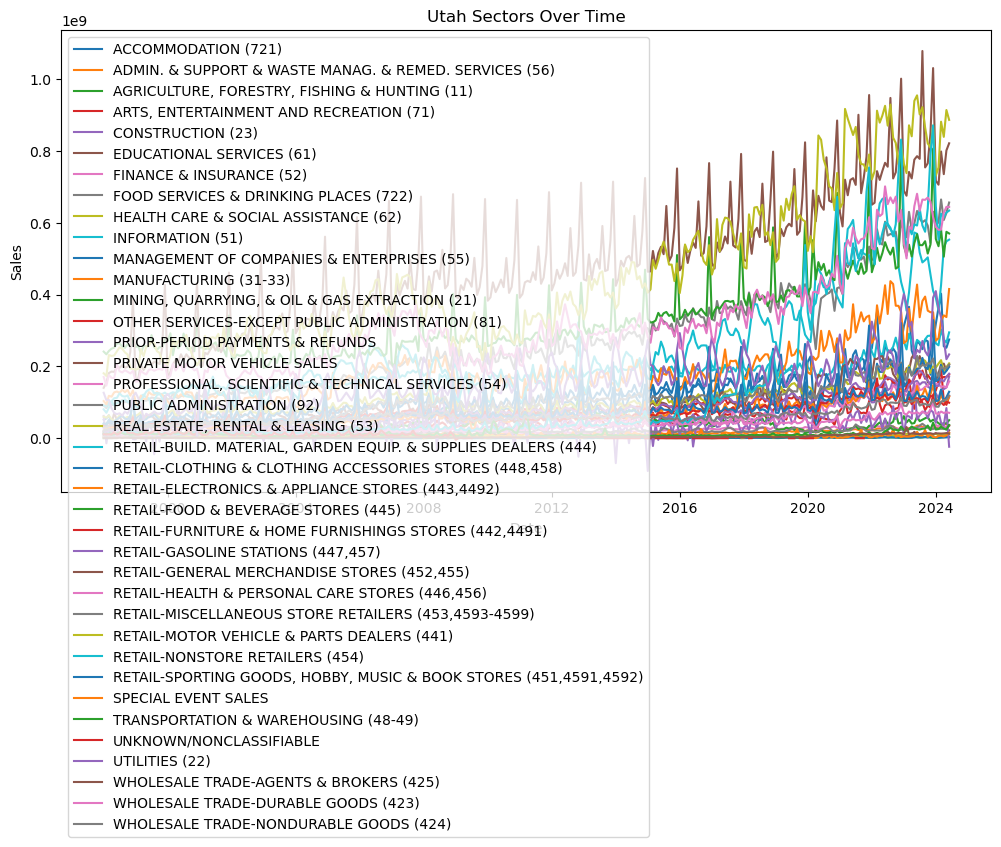

In [10]:
# Plot this change in sales over time
ut_econ_sectors_pivot = ut_econ_sectors_df.pivot(index='date', columns='economic sector (naics code)', values='taxable sales')

plt.figure(figsize=(12, 6))
for sector in ut_econ_sectors_pivot.columns:
    plt.plot(ut_econ_sectors_pivot.index, ut_econ_sectors_pivot[sector], label=sector)

plt.title('Utah Sectors Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Date Conversion 


In [11]:
# Convert 'Date' column from Timestamp to Period (YYYY-MM)
# Convert 'date' column to Period if it's not already in PeriodDtype
if not pd.api.types.is_period_dtype(adjacent_cities_df['date']):
    adjacent_cities_df['date'] = pd.to_datetime(adjacent_cities_df['date']).dt.to_period('M')

def assign_sales_tax_rates(row):
    if row['city'] == 'Salt Lake City':
        if row['date'] <= pd.Period('2018-12'):
            # Salt Lake City rates before 2019
            return {
                'State Sales Tax': 4.70,
                'Local Sales Tax': 1.35,
                'Salt Lake City Sales Tax': 0.00,
                'Mass Transit Tax': 0.55,
                'Transportation Tax': 0.25,
            }
        elif row['date'] <= pd.Period('2019-12'):
            # Salt Lake City rates in 2019
            return {
                'State Sales Tax': 4.85,
                'Local Sales Tax': 1.35,
                'Salt Lake City Sales Tax': 0.50,
                'Mass Transit Tax': 0.55,
                'Transportation Tax': 0.25,
            }
        elif row['date'] >= pd.Period('2020-01'):
            # Salt Lake City rates after 2020
            return {
                'State Sales Tax': 4.85,
                'Local Sales Tax': 1.35,
                'Salt Lake City Sales Tax': 0.50,
                'Mass Transit Tax': 0.55,
                'Transportation Tax': 0.25,
            }
    else:
        # For all other cities, assign default rates
        return {
            'State Sales Tax': 4.85,
            'Local Sales Tax': 1.35,
            'City Sales Tax': 0.00,  # Assuming no city-specific tax for non-SLC cities
            'Salt Lake City Sales Tax': 0.0,
            'Mass Transit Tax': 0.55,
            'Transportation Tax': 0.25,
        }

# Apply the function to the DataFrame
adjacent_cities_df['Tax Rates'] = adjacent_cities_df.apply(assign_sales_tax_rates, axis=1)

# Now, split the dictionary into separate columns
adjacent_cities_df = adjacent_cities_df.join(adjacent_cities_df['Tax Rates'].apply(pd.Series))

# Drop the 'Tax Rates' column if no longer needed
adjacent_cities_df.drop(columns=['Tax Rates'], inplace=True)



C:\Users\drpon\AppData\Local\Temp\ipykernel_3400\3756187212.py:3: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if not pd.api.types.is_period_dtype(adjacent_cities_df['date']):
C:\Users\drpon\AppData\Local\Temp\ipykernel_3400\3756187212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adjacent_cities_df['date'] = pd.to_datetime(adjacent_cities_df['date']).dt.to_period('M')
C:\Users\drpon\AppData\Local\Temp\ipykernel_3400\3756187212.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [28]:
# Replace all NaN values in the DataFrame with 0
adjacent_cities_df.fillna(0, inplace=True)

# Create new columns for Year-Over-Year (YOY) percentage changes in each tax rate field
adjacent_cities_df['State Sales Tax Change'] = adjacent_cities_df['State Sales Tax'].diff(periods=12)  # YOY change
adjacent_cities_df['Local Sales Tax Change'] = adjacent_cities_df['Local Sales Tax'].diff(periods=12)  # YOY change
adjacent_cities_df['City Sales Tax Change'] = adjacent_cities_df['City Sales Tax'].diff(periods=12)    # YOY change
adjacent_cities_df['Salt Lake City Sales Tax Change'] = adjacent_cities_df['Salt Lake City Sales Tax'].diff(periods=12) # YOY change
adjacent_cities_df['Mass Transit Tax Change'] = adjacent_cities_df['Mass Transit Tax'].diff(periods=12)  # YOY change
adjacent_cities_df['Transportation Tax Change'] = adjacent_cities_df['Transportation Tax'].diff(periods=12)  # YOY change

# Create a new column for Year-Over-Year (YOY) percentage change in the 'Total Sales' field
adjacent_cities_df['Total Sales Change'] = adjacent_cities_df['sales'].diff(periods=12)  # YOY change

adjacent_cities_df.fillna(0, inplace=True)
adjacent_cities_df.tail()


,date,city,sales,State Sales Tax,Local Sales Tax,City Sales Tax,Salt Lake City Sales TAx,Mass Transit Tax,Transportation Tax,Salt Lake City Sales Tax,State Sales Tax Change,Local Sales Tax Change,City Sales Tax Change,Salt Lake City Sales Tax Change,Mass Transit Tax Change,Transportation Tax Change,Total Sales Change
12826,2024-06,Salt Lake City,962615143.0,4.85,1.35,0.0,0.0,0.55,0.25,0.5,0.0,0.0,0.0,0.5,0.0,0.0,925104203.0
12831,2024-06,South Salt Lake,195206096.0,4.85,1.35,0.0,0.0,0.55,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-43440376.0
12835,2024-06,Taylorsville,72128665.0,4.85,1.35,0.0,0.0,0.55,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27155431.0
12839,2024-06,West Valley City,318753097.0,4.85,1.35,0.0,0.0,0.55,0.25,0.0,0.0,0.0,0.0,-0.5,0.0,0.0,-588535375.0
12840,2024-06,Woods Cross,51221455.0,4.85,1.35,0.0,0.0,0.55,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-146568661.0


## Comparison Data set from published tax elasticity research

In [13]:
print(adjacent_cities_df.head())
adjacent_cities_df.to_csv('outputs/adjacent_cities_df_output.csv', index=False)

       date             city         sales  State Sales Tax  Local Sales Tax  \
1   1998-01        Bountiful  1.976665e+07             4.85             1.35   
13  1998-01           Murray  8.175579e+07             4.85             1.35   
14  1998-01  North Salt Lake  6.961051e+06             4.85             1.35   
21  1998-01   Salt Lake City  2.565569e+08             4.70             1.35   
25  1998-01  South Salt Lake  6.440786e+07             4.85             1.35   

    City Sales Tax  Salt Lake City Sales TAx  Mass Transit Tax  \
1              0.0                       0.0              0.55   
13             0.0                       0.0              0.55   
14             0.0                       0.0              0.55   
21             0.0                       0.0              0.55   
25             0.0                       0.0              0.55   

    Transportation Tax  Salt Lake City Sales Tax  State Sales Tax Change  \
1                 0.25                       0

In [14]:
df = pd.read_stata('data-sources\county_sales_tax_data.dta')

# Display the first few rows of the DataFrame
print(df.head())

   year  month state  fips_state_code  fips_county  total_sales_tax  \
0  2003      1    AL                1          1.0              NaN   
1  2003      2    AL                1          1.0              NaN   
2  2003      3    AL                1          1.0              NaN   
3  2003      4    AL                1          1.0              NaN   
4  2003      5    AL                1          1.0              NaN   

   state_sales_tax  local_sales_tax  county_sales_tax  city_sales_tax  \
0             0.04              NaN               NaN             NaN   
1             0.04              NaN               NaN             NaN   
2             0.04              NaN               NaN             NaN   
3             0.04              NaN               NaN             NaN   
4             0.04              NaN               NaN             NaN   

   mta_sales_tax  spd_sales_tax  other_sales_tax  
0            NaN            NaN              NaN  
1            NaN            NaN 

# Model 1: Linear Regression

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [16]:
# Load Dataset to use
model_set = adjacent_cities_df

In [17]:
# Prepare Data
X = model_set[['State Sales Tax Change','Local Sales Tax Change', 'City Sales Tax Change', 'Salt Lake City Sales Tax Change','Mass Transit Tax Change','Transportation Tax Change']]  # Replace with your feature columns
y = model_set['Total Sales Change']                   # Replace with your target column

# Split your data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Create the model
model = LinearRegression()

In [20]:
# Fit the model
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Make predictions
predictions = model.predict(X_test)

In [22]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 1.0444297953255236e+16
R² Score: 0.8154420840986586


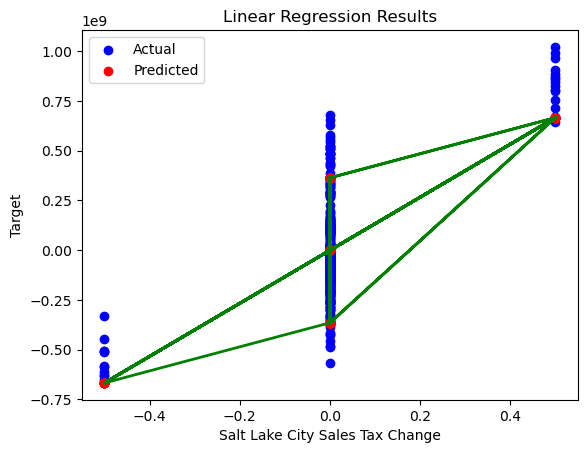

In [27]:
# Visualize the results
plt.scatter(X_test['Salt Lake City Sales Tax Change'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Salt Lake City Sales Tax Change'], predictions, color='red', label='Predicted')
plt.plot(X_test['Salt Lake City Sales Tax Change'], predictions, color='green', linewidth=2)
plt.xlabel('Salt Lake City Sales Tax Change')
plt.ylabel('Target')
plt.title('Linear Regression Results')
plt.legend()
plt.show()

# Model: Random Forest 

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
# Initialize and fit the random forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Display results
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

KeyError: "None of [Index(['amount_raised', 'num_backers', 'campaign_duration'], dtype='object')] are in the [columns]"

In [ ]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor: Actual vs Predicted')
plt.legend()
plt.grid()
plt.show()